# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [45]:
import platform;
print('Current Python Version is: ' + str(platform.python_version()));

Current Python Version is: 3.6.6


## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [47]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.2478439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

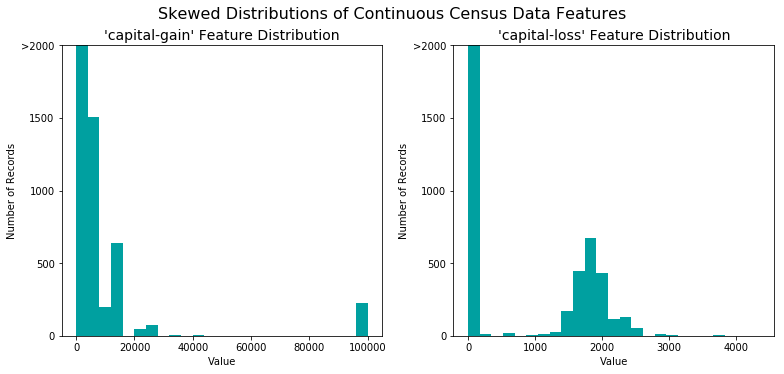

In [48]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

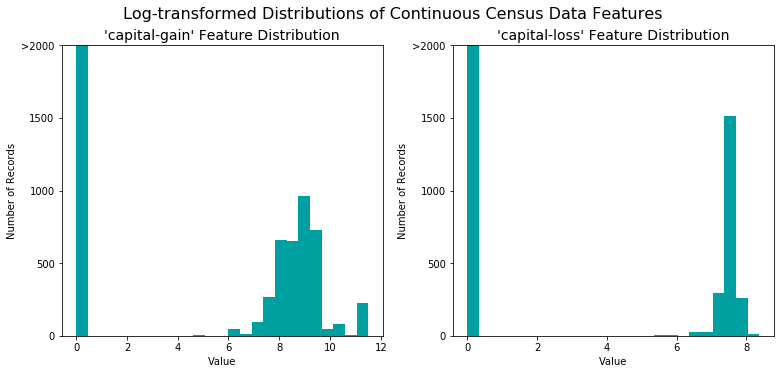

In [49]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [50]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [53]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform);

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.astype('category').cat.codes;

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded[0:10]);

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc']


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [54]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [32]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
q1_tp = np.sum(income);
accuracy = (q1_tp / (q1_tp + income.count() - q1_tp));
recall = 1;
precision = accuracy;

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = ((1+0.25)*precision * recall) / (0.25*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

1. Random Forest.

    a. Random Forests are used in the banking industry to identify loyal customers against fraudulent customers. (https://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/)
    
    b. Random Forests are less likely to overfit because we ensemble multiple decision trees, each trained on a separate set of features and training data subset. The classification won't be based on a single training set. (https://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/)
    
    c. Random Forests don't work well on sparse data, and when number of features is very high compared to the amount of data. In these cases, a domain specific algorithm would be better, because random forests don't recognize structured data well, such as time-series. (https://stats.stackexchange.com/questions/112148/when-to-avoid-random-forest)
    
    d. Random Forests can be used for feature-engineering. Because each tree has a separate random set of features, they can be used to identify the most contributing features, which will be important for us since there are 103 features after pre-processing. (https://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/)
    
2. Support Vector Machines.

    a. SVMs are used in BioInformatics for classifying proteins by modeling the protein sequences. There are also effective in classifying text and faces, which means that they work well with a large number of features. (https://data-flair.training/blogs/applications-of-svm/)
    
    b. SVMs tend generalize on the data really well because they rely on finding support vectors that separate classes of points. Because of this, once the support boundaries are found, all points other than these core set of points will be redundant. This means that small changes to the data will not affect the model. This makes the SVMs resiliant to overfitting. (http://www.simafore.com/blog/bid/112816/When-do-support-vector-machines-trump-other-classification-methods)
    
    c. SVMs do not provide a probability estimates for each data point, because only the core set of points are important for training. A more complicated process involving cross validation may be required to obtain prediction probabilities (http://scikit-learn.org/stable/modules/svm.html).
    
    d. SVMs are effective in high-dimensional spaces, which is important for our dataset with over 100 features. We also have a lot of data so the training process would be able to find a generalized model that fits the data. (http://scikit-learn.org/stable/modules/svm.html)
    
3. K-Nearest Neighbors

    a. KNNs have an application in Brest Cancer detection. People with similar physical traits are likely to be closer together, making it easier to detect cancer by identifying the closest points for that person's traits. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2243774/)
    
    b. The cost of training is 0, so it is very inexpensive to build the model. KNNs also use all of the training data in classification, unlike SVMs which summarize the data, making them difficult to classify points when class labels overlap. (www.cs.uvm.edu/~xwu/kdd/kNN-11.ppt)
    
    c. The training process (keeping all of the data) is also a disadvantage in some scenarios, because although training is inexpensive, testing can be very costly. For higher dimensional data, an index may be required to reduce reading time. A distance measure that works properly with large dimensional data may also be needed. (https://stats.stackexchange.com/questions/44518/for-what-type-of-problems-nearest-neighbor-performs-better)
    
    d. In our problem, we are only classifying two labels, and people above or below the 50K income are likely to share similar traits, such as education, occupation, and hours-per-week, so an unknown person will be easy to identify based on how close they are to other people with similar traits. The testing accuracy will probably offset the larget prediction time required by the algorithm. The problem we are solving is similar to the Breast Cancer detection problem. (www.cs.uvm.edu/~xwu/kdd/kNN-11.ppt)
    

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [40]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score;
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size]);
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start;
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test);
    predictions_train = learner.predict(X_train[:300]);
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start;
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train);
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test);
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5);
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5);
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


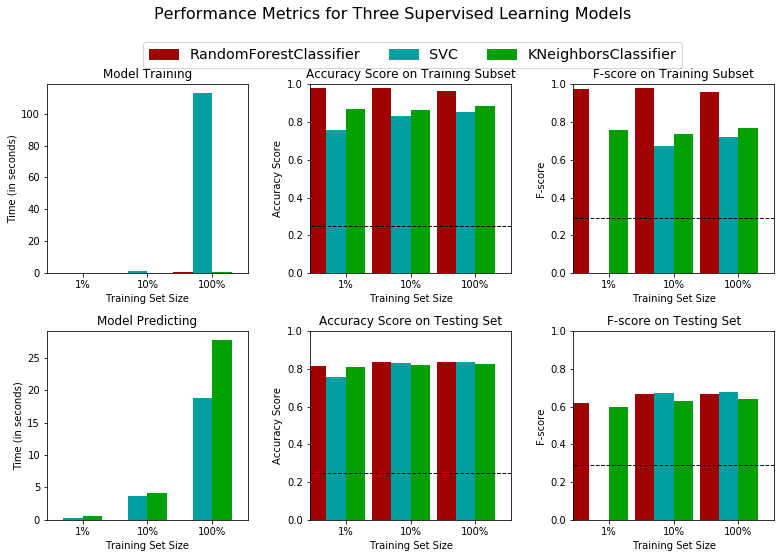

In [41]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier;

# TODO: Initialize the three models
clf_A = RandomForestClassifier();
clf_B = SVC();
clf_C = KNeighborsClassifier();

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(X_train);
samples_10 = int(0.1 * len(X_train));
samples_1 = int(0.01 * len(X_train));

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

The most suitable algorithm for this data is Random Forest. On a 100% sample size, the Random Forest algorithm tied for the highest F-score within a 1% difference with SVM. The F-score is very reasonable for a model trained with default parameters, and can be tuned to reduce the variance between the training/testing sets. The SVM model on the other hand, faces a Bias problem.

The training and testing time for Random Forests is also the best. As expected, SVMs had high training time, and reasonable testing time. And the KNNs had very low training time and very high testing time. Compared to these, Random Forests had both low training and low testing time, which is because we are training small decision trees instead of building one larger model like the other models are.

The Random Forest algorithm is most suitable for this data because it also does Feature Engineering. We have over a 100 features, which means that we need to find the most important features that contribute information. Although the model overfit on the training data, it shows that it was able to find the right set of features and conditions to separate the data, and by tuning the model, we can reduce the variance. With SVMs, we have a bias problem, and to tune the model, we will need to find the right kernel to use. And even with a standard linear kernel, we get a large training and testing time, which will make it difficult to do a grid search in reasonable time.

One good thing about all 3 models is that the F-beta score is similar for the 10% sample compared to the 100% sample, so we can use the 10% sample to tune each model and expect the model to perform well on the 100% sample.





### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

The final chosen model is Random Forests. To explain Random Forests, Decision Trees need to be understood first.

A Decision Tree model is a tree-like classification model that separates the data recursively. At each step, the model selects a feature which best divides the data. At each next step, we find the feature which divides the data best within than split. We do this recursively until we have a tree that reasonably divides the data into the two labels.

In the following example, we see how a decision tree can be used to make a decision on whether a passenger will survive. When we get a new unseen data point, we simply follow through the tree and select the predicted decision when we reach a leaf node.
<img src='https://cdn-images-1.medium.com/max/600/1*XMId5sJqPtm8-RIwVVz2tg.png'></img>

In a Random Forest, the main difference is that we have multiple decision trees. Let's say that we have 50 features in our data. For each decision tree in the forest, we take a random sample of the features, and use the set as the basis for the tree. This means that within the random set of features, we choose the feature that best divides the data. We continue to do this for the other features in that random set. This process is repeated for each new decision tree we add to the forest.

Because of the randomness introduced when selecting features, the decision tree can cover a wide variety of features at the top nodes. This allows the model to cover a large range of features.

<img src='https://cdn-images-1.medium.com/max/800/1*VazskTxC0XHVavsOJgS0sg.png'></img>

As shown in the image above, the multiple decision trees can be used to collectively make a decision. So, if we have 5 decision trees, and a majority of them select label `A` over label `B`, the final decision will be label `A`.

A good advantage of Random Forests is that it is less likely to overfit if the right hyperparameters are chosen. Because of the randomness in the model, each tree within the forest will likely have a different set of core features, so the model will be learning how to make a decision using different features each time. This is going to be useful for our data because we have a large number of features and large size of data.

To understand Decision Trees, refer to the following link: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

For Random Forests, the following link: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [35]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV;
from sklearn.metrics import make_scorer;

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0);

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators' : [5, 10, 20, 40, 60, 80], 'max_depth' : [None, 3, 5, 10, 15], \
              'min_samples_split' : [2, 10, 25, 50, 100, 200, 500, 1000], 'min_samples_leaf' : [2, 10, 25, 50, 100]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, verbose=10);

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train);

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.715942 -   0.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.716771 -   0.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.720749 -   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.729568 -   0.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.721698 -   0.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.730066 -   0.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.732673 -   0.6s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.726316 -   0.6s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.739843 -   0.6s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40, score=0.736123 -   1.1s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40, score=0.729987 -   1.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=40, score=0.739932 -   1.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60, score=0.734232 -   1.7s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60, score=0.729466 -   1.5s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=60, score

[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=5, score=0.724783 -   0.1s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=5, score=0.735450 -   0.1s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10, score=0.725509 -   0.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10, score=0.727933 -   0.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=10, score=0.731618 -   0.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=50, n_estimators=2

[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=40, score=0.731470 -   0.8s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=40, score=0.732540 -   0.9s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60, score=0.729344 -   1.3s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60, score=0.730351 -   1.2s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=60, score=0.734371 -   1.4s
[CV] max_depth=None, min_samples_leaf=2, min_samples_split=200, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=2, min_samples_split=200, 

[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=5, score=0.722174 -   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=5, score=0.724377 -   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, score=0.719097 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, score=0.723315 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=10, score=0.729486 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=2

[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=40, score=0.728367 -   0.8s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=40, score=0.729036 -   0.8s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60, score=0.728872 -   1.3s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60, score=0.728364 -   1.3s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=60, score=0.727719 -   1.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=25, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=25, 

[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=5, score=0.723370 -   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=5, score=0.725924 -   0.1s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10, score=0.726205 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10, score=0.724177 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=10, score=0.724209 -   0.2s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=200, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_spl

[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=40, score=0.690290 -   0.6s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=40, score=0.689577 -   0.6s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=40, score=0.696755 -   0.6s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=60, score=0.701716 -   0.9s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=60, score=0.703174 -   0.9s
[CV] max_depth=None, min_samples_leaf=10, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=10, mi

[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=10, n_estimators=80, score=0.730144 -   1.5s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.720398 -   0.1s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.709859 -   0.1s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.724588 -   0.1s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=10, score=0.721905 -   0.2s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=25, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=25, n_esti

[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=20, score=0.722629 -   0.4s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=20, score=0.726802 -   0.4s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.714528 -   0.7s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.716695 -   0.7s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.721076 -   0.7s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=100, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_

[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=500, n_estimators=80, score=0.716284 -   1.2s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=500, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=500, n_estimators=80, score=0.716895 -   1.2s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=500, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=500, n_estimators=80, score=0.722014 -   1.2s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=1000, n_estimators=5, score=0.706030 -   0.1s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_split=1000, n_estimators=5, score=0.694647 -   0.1s
[CV] max_depth=None, min_samples_leaf=25, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=25, min_samples_

[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=10, score=0.699236 -   0.2s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20, score=0.706728 -   0.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20, score=0.706141 -   0.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=20, score=0.712229 -   0.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=40, score=0.708939 -   0.6s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=10, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=10, 

[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=60, score=0.711888 -   0.9s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=60, score=0.713266 -   1.0s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80, score=0.713541 -   1.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80, score=0.711834 -   1.2s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=50, n_estimators=80, score=0.711934 -   1.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=100, n_estimators=5 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=100,

[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=10, score=0.702666 -   0.2s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=10, score=0.694333 -   0.2s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=10, score=0.698494 -   0.2s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=20, score=0.706479 -   0.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=20, score=0.698272 -   0.3s
[CV] max_depth=None, min_samples_leaf=50, min_samples_split=500, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=50, min_samples_

[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=40, score=0.695265 -   0.6s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60, score=0.701802 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60, score=0.696197 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=60, score=0.700917 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=80, score=0.702551 -   1.1s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=2, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=2, 

[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=5, score=0.687289 -   0.1s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=0.693701 -   0.2s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=0.686099 -   0.2s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=10, score=0.694170 -   0.2s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=20, score=0.708857 -   0.3s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=50, n_estimators=20 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_

[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=40, score=0.693119 -   0.6s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=40 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=40, score=0.695265 -   0.6s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60, score=0.701802 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60, score=0.696197 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60 
[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=60, score=0.700917 -   0.8s
[CV] max_depth=None, min_samples_leaf=100, min_samples_split=200, n_estimators=80 
[CV]  max_depth=None, min_samples_leaf=100, m

[CV]  max_depth=None, min_samples_leaf=100, min_samples_split=1000, n_estimators=80, score=0.688136 -   0.9s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.599577 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.509948 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=5, score=0.437407 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.590403 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.562261 -   0.1s
[CV] max_dep

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=40, score=0.538874 -   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=40, score=0.474045 -   0.3s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60, score=0.505080 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60, score=0.530342 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=60, score=0.494961 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=25, n_estimators=80, score=0.504153 -   0.6s
[CV

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=5, score=0.437407 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10, score=0.590403 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10, score=0.562261 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=10, score=0.457103 -   0.1s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=20, score=0.572079 -   0.2s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=200, n_estimators=20, score=0.592456 - 

[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=60, score=0.474045 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=60, score=0.465208 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=60, score=0.459067 -   0.4s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80, score=0.476573 -   0.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80, score=0.454922 -   0.5s
[CV] max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=2, min_samples_split=1000, n_estimators=80, score

[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=10, score=0.457103 -   0.1s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20, score=0.571126 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20, score=0.603666 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=20, score=0.505924 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=40, score=0.503057 -   0.3s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=25, n_estimators=40 
[CV]  max_depth=3

[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=60, score=0.479507 -   0.4s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.498922 -   0.6s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.484522 -   0.6s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=100, n_estimators=80, score=0.501081 -   0.6s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=200, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=200, n_estimators=5, score=0.599577 -   0.1s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=200, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=200, n_estimators=5, score=0.5

[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=20, score=0.507313 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=20, score=0.557920 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=20, score=0.495775 -   0.2s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=40, score=0.457781 -   0.3s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=40, score=0.482399 -   0.3s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=1000, n_estimator

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=10, n_estimators=80, score=0.524925 -   0.6s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=10, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=10, n_estimators=80, score=0.506341 -   0.6s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.599577 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.527927 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=5, score=0.437407 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=25, n_estimators=10, score=0.589989 -   0.1

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.503057 -   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.539335 -   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=40, score=0.471605 -   0.3s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60, score=0.499321 -   0.4s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60, score=0.519492 -   0.4s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=100, n_estimators=60, score

[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=5, score=0.424457 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10, score=0.431786 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10, score=0.546684 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=10, score=0.496560 -   0.1s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=20, score=0.507313 -   0.2s
[CV] max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=25, min_samples_split=1000, n_estimators

[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=60, score=0.498155 -   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=60, score=0.517942 -   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=60, score=0.456535 -   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80, score=0.500294 -   0.6s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80, score=0.503080 -   0.5s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=10, n_estimators=80, score=0.484391 -

[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=0.561420 -   0.1s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=10 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=10, score=0.458107 -   0.1s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20, score=0.571126 -   0.2s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20, score=0.602978 -   0.2s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=20, score=0.421987 -   0.2s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=100, n_estimators=40, score

[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=60, score=0.513985 -   0.5s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=60 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=60, score=0.457856 -   0.4s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80, score=0.490585 -   0.5s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80, score=0.467912 -   0.5s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=500, n_estimators=80, score=0.447094 -   0.6s
[CV] max_depth=3, min_samples_leaf=50, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=50, min_samples_split=1000, n_estimators=5, score

[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20, score=0.572010 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20, score=0.590654 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=20, score=0.454268 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=40, score=0.501948 -   0.3s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=40, score=0.507966 -   0.3s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=10, n_estimators=40 
[CV]  

[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=50, n_estimators=80, score=0.473900 -   0.5s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=50, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=50, n_estimators=80, score=0.481584 -   0.5s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=50, n_estimators=80 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=50, n_estimators=80, score=0.457783 -   0.5s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5, score=0.598757 -   0.1s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5, score=0.525237 -   0.1s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=100, n_estimators=5, score

[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20, score=0.564555 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20, score=0.590654 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=20, score=0.453989 -   0.2s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=40, score=0.490473 -   0.3s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=40 
[CV]  max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators=40, score=0.508683 -   0.3s
[CV] max_depth=3, min_samples_leaf=100, min_samples_split=500, n_estimators

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80, score=0.696368 -   0.7s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80, score=0.680206 -   0.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=80, score=0.685462 -   0.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5, score=0.659077 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5, score=0.634306 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=5, score=0.654740 -   0.1s
[CV] max_depth

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=20, score=0.685496 -   0.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=20, score=0.686364 -   0.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40, score=0.691891 -   0.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40, score=0.672018 -   0.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=40, score=0.676780 -   0.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=50, n_estimators=60, score=0.699474 -   0.5s
[CV

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=200, n_estimators=80, score=0.691426 -   0.8s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5, score=0.620064 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5, score=0.652232 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=5, score=0.569549 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=10, score=0.651147 -   0.1s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=500, n_estimators=10, score=0.664832 -   0.1

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=40, score=0.692190 -   0.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=40, score=0.673241 -   0.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=40, score=0.671642 -   0.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60, score=0.696523 -   0.7s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60, score=0.679509 -   0.7s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=60, score=0.680825 -   0.7s
[CV

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=5, score=0.658260 -   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10, score=0.665951 -   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10, score=0.677239 -   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=10, score=0.682711 -   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=20, score=0.690614 -   0.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=50, n_estimators=20, score=0.683230 - 

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=60, score=0.697558 -   0.6s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=60, score=0.678193 -   0.6s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=60, score=0.685287 -   0.7s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80, score=0.695060 -   0.8s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80, score=0.680831 -   0.7s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=200, n_estimators=80, score

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=0.671897 -   0.1s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=10, score=0.662986 -   0.1s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20, score=0.694246 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20, score=0.683752 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=20, score=0.673165 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=2, n_estimators=40, score=0.682972 -   0.4s
[CV

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=60, score=0.687686 -   0.5s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80, score=0.692621 -   0.7s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80, score=0.679243 -   0.8s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=80, score=0.689145 -   0.7s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=50, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=50, n_estimators=5, score=0.653342 -   0.1s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=50, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=50, n_estimators=5, score=0.632379 -   0

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=20, score=0.697389 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=20, score=0.672577 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=20, score=0.677646 -   0.2s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40, score=0.681204 -   0.4s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40, score=0.672968 -   0.4s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=200, n_estimators=40, score

[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=1000, n_estimators=80, score=0.684784 -   0.8s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=1000, n_estimators=80, score=0.674816 -   0.7s
[CV] max_depth=5, min_samples_leaf=25, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=5, min_samples_leaf=25, min_samples_split=1000, n_estimators=80, score=0.683095 -   0.7s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5, score=0.622010 -   0.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5, score=0.653245 -   0.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=2, n_estimators=5, score=0.673767 -  

[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=20, score=0.675806 -   0.2s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=20, score=0.677534 -   0.2s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40, score=0.688860 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40, score=0.676424 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=40, score=0.675086 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=25, n_estimators=60, score=0.693517 -

[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=100, n_estimators=80, score=0.679771 -   1.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5, score=0.646707 -   0.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5, score=0.668556 -   0.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=5, score=0.665992 -   0.1s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=10, score=0.654824 -   0.2s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=10, score=0.655

[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=20, score=0.661335 -   0.2s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40, score=0.666037 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40, score=0.659098 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40, score=0.672283 -   0.4s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=60, score=0.685582 -   0.6s
[CV] max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimator

[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=10, n_estimators=80, score=0.676900 -   0.8s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5, score=0.672661 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5, score=0.662100 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=5, score=0.615481 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=10, score=0.669254 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=25, n_estimators=10, score=0.626

[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=20, score=0.666596 -   0.2s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40, score=0.673086 -   0.4s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40, score=0.658046 -   0.4s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=40, score=0.668571 -   0.4s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=60, score=0.684242 -   0.5s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=100, n_estimator

[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=500, n_estimators=80, score=0.670504 -   0.8s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5, score=0.575164 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5, score=0.641274 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=5, score=0.652477 -   0.1s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=10, score=0.593913 -   0.2s
[CV] max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=100, min_samples_split=1000, n_estim

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20, score=0.733220 -   0.4s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40, score=0.728958 -   0.7s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40, score=0.732048 -   0.7s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40, score=0.730173 -   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60, score=0.730894 -   1.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60, score=0.731977 -

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=5, score=0.714531 -   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=5, score=0.707811 -   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10, score=0.717899 -   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10, score=0.719597 -   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=10, score=0.712384 -   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, n_estimators=20, score=0.

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=40, score=0.709590 -   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=40, score=0.719082 -   0.6s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60, score=0.720729 -   0.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60, score=0.717620 -   0.8s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=60, score=0.725265 -   0.8s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=500, n_estimators=80, score

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.709980 -   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.710016 -   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.720409 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.720141 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.708107 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=40, score=0.720417 -   0.6s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=40, score=0.722570 -   0.6s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60, score=0.723575 -   0.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60, score=0.727929 -   0.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=60, score=0.723571 -   0.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=50, n_estimators=80, score

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=5, score=0.712410 -   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=5, score=0.708009 -   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10, score=0.705330 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10, score=0.703753 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=10, score=0.711485 -   0.2s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=500, n_estimators=2

[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=40, score=0.714854 -   0.7s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=40, score=0.716941 -   0.7s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60, score=0.717611 -   1.0s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60, score=0.721991 -   0.9s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=60, score=0.724961 -   1.0s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=80, score=0.718440 -

[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=5, score=0.717508 -   0.1s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=5, score=0.708439 -   0.1s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=0.715484 -   0.2s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=0.709191 -   0.2s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=10, score=0.709379 -   0.2s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=50, n_estimators=20, score=0.

[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=40, score=0.703257 -   0.6s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=40, score=0.726542 -   0.6s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60, score=0.711619 -   0.8s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60, score=0.710635 -   0.9s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=60, score=0.727524 -   0.9s
[CV] max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=25, min_samples_split=200, n_estimator

[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=5, score=0.697453 -   0.1s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=5, score=0.705792 -   0.1s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=0.699679 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=0.689161 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=10, score=0.707935 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=2, n_estimators=20, score=0.711019 -   

[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=40, score=0.697779 -   0.6s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60, score=0.708196 -   0.8s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60, score=0.712503 -   0.8s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=60, score=0.704148 -   0.9s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=80, score=0.711028 -   1.3s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=25, n_estimators=80, score

[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=10, score=0.700820 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=10, score=0.691601 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=10, score=0.700546 -   0.2s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=20, score=0.702554 -   0.3s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=20, score=0.700098 -   0.3s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=200, n_estimator

[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=60, score=0.692635 -   0.7s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=60, score=0.686795 -   0.8s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=60, score=0.696638 -   0.8s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=80, score=0.697879 -   1.0s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=80, score=0.690501 -   0.9s
[CV] max_depth=10, min_samples_leaf=50, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=50, min_samples_split=1000, 

[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=10, score=0.675039 -   0.2s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=10, score=0.695167 -   0.2s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.696081 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.679304 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.701589 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=25, n_estimator

[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=60, score=0.689734 -   0.8s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=60 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=60, score=0.701576 -   0.8s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.702655 -   1.1s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.691680 -   1.0s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.701164 -   1.0s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=200, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=200, n

[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=10, score=0.660588 -   0.1s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=10, score=0.670662 -   0.1s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.686247 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.666987 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.670775 -   0.3s
[CV] max_depth=10, min_samples_leaf=100, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=100, min_samples_s

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=60, score=0.738117 -   1.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=60 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=60, score=0.737817 -   1.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80, score=0.735062 -   1.7s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80, score=0.738021 -   1.7s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=80, score=0.737761 -   1.9s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=25, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=25, n_estimators=5, score=0.714518 -  

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=10, score=0.731093 -   0.2s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20, score=0.729945 -   0.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20, score=0.731025 -   0.5s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=20, score=0.733101 -   0.6s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=40, score=0.733412 -   0.8s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=40, score

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=60, score=0.729647 -   1.0s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80, score=0.727932 -   1.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80, score=0.728435 -   1.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=500, n_estimators=80, score=0.729140 -   1.3s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=1000, n_estimators=5, score=0.699496 -   0.1s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=1000, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=1000, n_estimators=5, score

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.725050 -   0.2s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.726290 -   0.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.720510 -   0.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.734495 -   0.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=40, score=0.729495 -   0.7s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=40, score

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=60, score=0.734451 -   1.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80, score=0.730454 -   1.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80, score=0.730507 -   1.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=50, n_estimators=80, score=0.737811 -   1.5s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=100, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=100, n_estimators=5, score=0.713814 -   0.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=100, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=100, n_estimators=5, score

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=10, score=0.707262 -   0.2s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20, score=0.719355 -   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20, score=0.722594 -   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=20, score=0.716459 -   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=40, score=0.712886 -   0.6s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=500, n_estimator

[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=60, score=0.724035 -   1.0s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80, score=0.720992 -   1.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80, score=0.719622 -   1.4s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=2, n_estimators=80, score=0.725326 -   1.4s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=10, n_estimators=5, score=0.712494 -   0.1s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=10, n_estimators=5, score=0.713162 -

[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=20, score=0.718254 -   0.4s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=20, score=0.721776 -   0.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=20, score=0.719199 -   0.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40, score=0.718645 -   0.6s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40, score=0.717389 -   0.7s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=50, n_estimators=40, score

[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=200, n_estimators=80, score=0.722655 -   1.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=200, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=200, n_estimators=80, score=0.720270 -   1.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=200, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=200, n_estimators=80, score=0.718318 -   1.3s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5, score=0.694662 -   0.1s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5, score=0.705200 -   0.1s
[CV] max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=25, min_samples_split=500, n_estimators=5, 

[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=20, score=0.712035 -   0.3s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=20, score=0.705762 -   0.3s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=20, score=0.717764 -   0.3s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40, score=0.708867 -   0.6s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40, score=0.704452 -   0.6s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=2, n_estimators=40, score=0.712641 -

[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=25, n_estimators=80, score=0.714163 -   1.2s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=25, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=25, n_estimators=80, score=0.712749 -   1.2s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=25, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=25, n_estimators=80, score=0.714096 -   1.2s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5, score=0.718685 -   0.1s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5, score=0.706994 -   0.1s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=50, n_estimators=5, score=0.704

[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20, score=0.713912 -   0.4s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20, score=0.695747 -   0.3s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20, score=0.718191 -   0.3s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=40, score=0.711409 -   0.7s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=40, score=0.700959 -   0.6s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimator

[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=80, score=0.701754 -   1.0s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=80, score=0.690400 -   1.0s
[CV] max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=80, score=0.698108 -   1.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5, score=0.691080 -   0.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5, score=0.680333 -   0.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=2, n_estimators=5, s

[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.703605 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.689479 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=20, score=0.693758 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=40, score=0.697148 -   0.5s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=40, score=0.694177 -   0.6s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=25, n_estimator

[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.701444 -   1.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=100, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.700611 -   1.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=100, n_estimators=80 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=100, n_estimators=80, score=0.699450 -   1.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=200, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=200, n_estimators=5, score=0.691080 -   0.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=200, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=200, n_estimators=5, score=0.680333 -   0.1s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=200, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=200, n_est

[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.688501 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.667468 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=20, score=0.685606 -   0.3s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=40, score=0.689908 -   0.5s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=40, score=0.675434 -   0.5s
[CV] max_depth=15, min_samples_leaf=100, min_samples_split=1000, n_estimators=40 
[CV]  max_depth=15, min_samples_leaf=100, min_samples_s

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 29.2min finished


Unoptimized model
------
Accuracy score on testing data: 0.8378
F-score on testing data: 0.6717

Optimized Model
------
Final accuracy score on the testing data: 0.8614
Final F-score on the testing data: 0.7324


In [37]:
# Saving results 
from sklearn.externals import joblib;

joblib.dump(clf, 'clf.pkl')
joblib.dump(grid_obj, 'grid_obj.pkl');
joblib.dump(best_clf, 'best_clf.pkl');

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.8378           |  0.8614         |
| F-score        |  0.6717           |  0.7324         |


**Answer: **

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

I believe that the following 5 features will be of most importance, in order:

1. Education number - People with higher education are more likely to have higher income. It's more likely that a college graduate will be able to get a job making >50K than a person with a high school degree is.

2. Occupation - Different occupations have different sallary ranges. For example, a person working in Sales is more likely to make >50K because he will be working on commision, and a person in Tech Support is less likely because he would be getting paid in minimum wage.

3. Hours-Per-Week - Most occupations have wages by hour, so  a person working 80 Hours a week will be earning twice that of a person working 40 hours, if they have similar occupations.

4. Sex - There is a well known Gender gap issue in the United States, and although it is wrong, it is likely to be a separating attribute for the amount a person makes.

5. Age - I think that Age will be a Bell Curve, with people in mid-range making more money than people on either side of it. This is because people have less experience when they are younger, so they will have less income. And those that are older will be closer or in retirement, and also make less money in that case.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

Index(['capital-gain', 'marital-status_ Married-civ-spouse',
       'relationship_ Husband', 'age', 'education-num'],
      dtype='object')


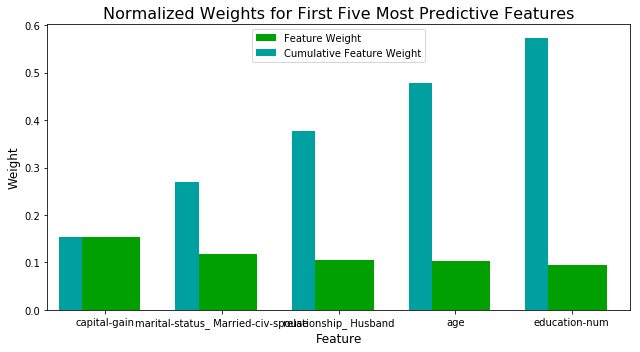

In [38]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state=0, max_depth=None, \
                               min_samples_leaf=2, min_samples_split=2, n_estimators=20);

model.fit(X_train, y_train);
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

features = X_train.columns;
importances_order = np.argsort(importances)[::-1];
print(features[importances_order[0:5]])
# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

I got 2 attributes correct, and 1 partially correct. These are Education, Age, and Relationship_husband

- I chose Education Number as a contributing factor, and it is among the five contributing attributes.
- I chose Age as well, and it was also among them.
- I chose Sex as a feature, and although it is not in the important featurs, relationship_husband is, which implies that gender is a contributing factor when the person is married. I did not think that relationship would be a contributing feature, but I did choose gender, so I think this is a partial 
(partially because this implies that the gender is a contributing factor when the person is married, I did not guess relationship as a factor, but I did gender).




### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [39]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8614
F-score on testing data: 0.7324

Final Model trained on reduced data
------
Accuracy on testing data: 0.8439
F-score on testing data: 0.6910


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

1. The final model's F-score is 4% less on the Reduced Features set than it is on the complete features set. However, it was still an improvement on the unoptimzed model that was trained in an earlier step, which shows that the reduced feature set is good enough to divide the data properly for classification.

2. If training time was a factor, I think that the reduced feature set could be useful because it still outperformed the unoptimized model. Also, because the training score is itself small, it shows that the problem we are facing is a Bias problem, and not a Variance problem. This means that with a reduced amount of data, we will be unable to improve our results beyond a small margin. In this case, when training time is a factor, the reduced dataset would give decent results with a Random Forest.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [55]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 1144519 bytes to finding_donors.html']